# PROJECT #3 - CLUSTER ANALYSIS - UNSUPERVISED CLASSIFICATION

### Objective: *using the dataset of country-level COVID-19 cases of July 19, 2020, verify if it is possible to identify a pattern of groups of country with similar characteristics*.

## Step 1 - Importing the dataset

In [1]:
import pandas as pd
import numpy as np

random_state = 20200720
np.seterr(divide='ignore', invalid='ignore')

df = pd.read_csv("World_Covid19_cases.csv", sep=',')
df.head()

,Number,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,1,USA,"3,893,949","60,678","143,263",386.0,"1,802,110","1,948,576","16,616","11,761",433,"48,324,182","145,951","331,097,557"
1,2,Brazil,"2,098,389","23,143","79,488",671.0,"1,371,229","647,672","8,318","9,869",374,"4,911,063","23,096","212,632,374"
2,3,India,"1,118,107","40,243","27,503",675.0,"700,399","390,205","8,944",810,20,"13,791,869","9,989","1,380,641,231"
3,4,Russia,"771,546","6,109","12,342",95.0,"550,344","208,860","2,300","5,287",85,"24,991,740","171,249","145,937,686"
4,5,South Africa,"364,328","13,449","5,033",85.0,"191,059","168,236",539,"6,139",85,"2,471,747","41,652","59,342,751"


## Step 2 - Preprocessing

In [2]:
# dimensions of the dataset
df.shape

(214, 14)

In [3]:
# 2a - Selection of columns
columns = ['Country', 'Total Cases', 'Total Deaths', 'Total Recovered', 
           'Active Cases', 'Critical Cases', 'Total Tests', 'Population']

df_use = df[columns]
df_use.shape

(214, 8)

In [4]:
# 2b - Removing the comma in the numeric colums
df_use = df_use[columns].replace(",", "", regex=True)
df_use.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,3893949,143263,1802110,1948576,16616,48324182,331097557
1,Brazil,2098389,79488,1371229,647672,8318,4911063,212632374
2,India,1118107,27503,700399,390205,8944,13791869,1380641231
3,Russia,771546,12342,550344,208860,2300,24991740,145937686
4,South Africa,364328,5033,191059,168236,539,2471747,59342751


In [5]:
df_use.dtypes

Country            object
Total Cases        object
Total Deaths       object
Total Recovered    object
Active Cases       object
Critical Cases     object
Total Tests        object
Population         object
dtype: object

In [6]:
# 2c - Converting to numeric values
columns_temp = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 
                'Critical Cases', 'Total Tests', 'Population']

df_temp = df_use[columns_temp].apply(pd.to_numeric, errors='coerce')

# 2d - Appending the 'Country' column to dataset
df_temp['Country'] = df_use['Country']
df_use = df_temp

df_use.dtypes

Total Cases        float64
Total Deaths       float64
Total Recovered    float64
Active Cases       float64
Critical Cases     float64
Total Tests        float64
Population         float64
Country             object
dtype: object

In [7]:
df_use.isnull().sum()

Total Cases         1
Total Deaths       28
Total Recovered     1
Active Cases        1
Critical Cases     86
Total Tests        20
Population          2
Country             1
dtype: int64

In [8]:
# 2e - Missing values to 0 in 'Total Deaths' and 'Critical Cases' columns
df_use[['Total Deaths', 'Critical Cases']] = df_use[['Total Deaths', 'Critical Cases']].fillna(0)

df_use.isna().sum()

Total Cases         1
Total Deaths        0
Total Recovered     1
Active Cases        1
Critical Cases      0
Total Tests        20
Population          2
Country             1
dtype: int64

In [9]:
# 2f - Dropping missing values
df_use.dropna(inplace=True)

df_use.isna().sum()

Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Critical Cases     0
Total Tests        0
Population         0
Country            0
dtype: int64

In [10]:
df_use.shape

(194, 8)

In [11]:
df_use.dtypes

Total Cases        float64
Total Deaths       float64
Total Recovered    float64
Active Cases       float64
Critical Cases     float64
Total Tests        float64
Population         float64
Country             object
dtype: object

In [12]:
# converting the 'object' type to numeric
df_temp = df_use[columns_temp].apply(pd.to_numeric, errors='coerce')
df_temp['Country'] = df_use['Country']
df_use = df_temp

df_use.dtypes

Total Cases        float64
Total Deaths       float64
Total Recovered    float64
Active Cases       float64
Critical Cases     float64
Total Tests        float64
Population         float64
Country             object
dtype: object

In [13]:
# 2g - Creating new column
df_use['Pop_ml'] = df_use['Population'] / 1000000

In [14]:
# 2h - Creating new columns
df_use['Mortality_rate'] = df_use['Total Deaths'] / df_use['Total Cases']
df_use['Cases_per_ml'] = df_use['Total Cases'] / df_use['Pop_ml']
df_use['Deaths_per_ml'] = df_use['Total Deaths'] / df_use['Pop_ml']
df_use['Recovered_per_ml'] = df_use['Total Recovered'] / df_use['Pop_ml']
df_use['Active_per_ml'] = df_use['Active Cases'] / df_use['Pop_ml']
df_use['Critical_per_ml'] = df_use['Critical Cases'] / df_use['Pop_ml']
df_use['Tests_per_ml'] = df_use['Total Tests'] / df_use['Pop_ml']

In [15]:
df_use.dtypes

Total Cases         float64
Total Deaths        float64
Total Recovered     float64
Active Cases        float64
Critical Cases      float64
Total Tests         float64
Population          float64
Country              object
Pop_ml              float64
Mortality_rate      float64
Cases_per_ml        float64
Deaths_per_ml       float64
Recovered_per_ml    float64
Active_per_ml       float64
Critical_per_ml     float64
Tests_per_ml        float64
dtype: object

In [16]:
# 2i - dropping unnecessary columns for processing
columns_drop = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 
                'Critical Cases', 'Total Tests', 'Population', 'Pop_ml']

df_final = df_use.drop(columns=columns_drop, axis=0)

df_final.shape

(194, 8)

In [17]:
df_final.head()

,Country,Mortality_rate,Cases_per_ml,Deaths_per_ml,Recovered_per_ml,Active_per_ml,Critical_per_ml,Tests_per_ml
0,USA,0.036791,11760.730086,432.691202,5442.836898,5885.201986,50.184605,145951.490666
1,Brazil,0.037880,9868.624239,373.828305,6448.825145,3045.970789,39.119161,23096.497056
2,India,0.024598,809.846161,19.920454,507.299785,282.625921,6.478149,9989.466264
3,Russia,0.015996,5286.818101,84.570342,3771.088984,1431.158776,15.760151,171249.392018
4,South Africa,0.013814,6139.385078,84.812381,3219.584478,2834.988220,9.082828,41652.046094


In [18]:
# 2j - Dropping "country"
df_temp = df_final.drop(columns=['Country'], axis=0)

df_temp.head()

,Mortality_rate,Cases_per_ml,Deaths_per_ml,Recovered_per_ml,Active_per_ml,Critical_per_ml,Tests_per_ml
0,0.036791,11760.730086,432.691202,5442.836898,5885.201986,50.184605,145951.490666
1,0.037880,9868.624239,373.828305,6448.825145,3045.970789,39.119161,23096.497056
2,0.024598,809.846161,19.920454,507.299785,282.625921,6.478149,9989.466264
3,0.015996,5286.818101,84.570342,3771.088984,1431.158776,15.760151,171249.392018
4,0.013814,6139.385078,84.812381,3219.584478,2834.988220,9.082828,41652.046094


In [19]:
# 2k - Scalling all numeric columns
from sklearn.preprocessing import StandardScaler

scalerRates = StandardScaler()
columns_scale = ['Mortality_rate', 'Cases_per_ml', 'Deaths_per_ml', 'Recovered_per_ml', 
                 'Active_per_ml', 'Critical_per_ml', 'Tests_per_ml']

features = df_temp[columns_scale]
features = scalerRates.fit_transform(features.values)
df_temp[columns_scale] = features

df_temp.head()

,Mortality_rate,Cases_per_ml,Deaths_per_ml,Recovered_per_ml,Active_per_ml,Critical_per_ml,Tests_per_ml
0,0.140172,1.961777,2.138489,0.880126,4.299014,2.794194,0.667439
1,0.169068,1.551085,1.778281,1.133636,1.952318,2.076678,-0.359577
2,-0.183282,-0.415172,-0.387439,-0.363635,-0.331656,-0.039862,-0.469146
3,-0.411452,0.556579,0.008182,0.458843,0.617635,0.562011,0.878918
4,-0.469333,0.741634,0.009664,0.319864,1.777936,0.129033,-0.204460


In [20]:
df_final[columns_scale] = df_temp[columns_scale]
df_final.head()

,Country,Mortality_rate,Cases_per_ml,Deaths_per_ml,Recovered_per_ml,Active_per_ml,Critical_per_ml,Tests_per_ml
0,USA,0.140172,1.961777,2.138489,0.880126,4.299014,2.794194,0.667439
1,Brazil,0.169068,1.551085,1.778281,1.133636,1.952318,2.076678,-0.359577
2,India,-0.183282,-0.415172,-0.387439,-0.363635,-0.331656,-0.039862,-0.469146
3,Russia,-0.411452,0.556579,0.008182,0.458843,0.617635,0.562011,0.878918
4,South Africa,-0.469333,0.741634,0.009664,0.319864,1.777936,0.129033,-0.204460


## Step 3 - Determining the Optimal Number of Clusters with Scipy.cluster.hierarchy

In [21]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

#Define function to show dendogram
def create_dendogram(data):
    plt.figure(figsize=(15, 10))
    plt.title("World Covid-19 Cases Dendogram")
    dend = shc.dendrogram(shc.linkage(data, method='ward'))

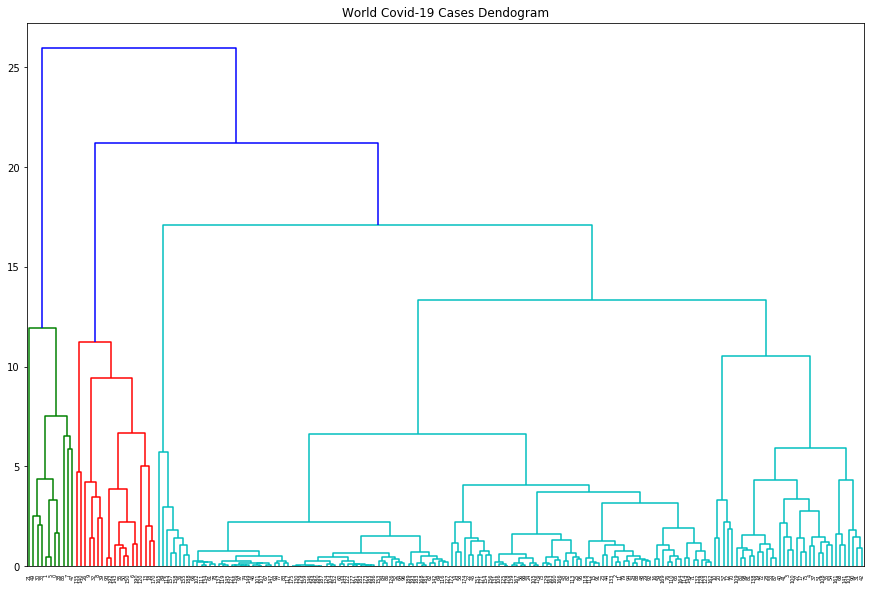

In [22]:
create_dendogram(df_final.drop(columns='Country', axis=0))

In [23]:
clusters_optimal = 3

Regarding to this technique, we can imply that there are 4 clusters due to 4 differente colours.

## Step 4 - Determining the Optimal Number of Clusters with Elbow Method

In [24]:
from sklearn.cluster import KMeans

# function to compute Withinness Sum of Squares (wss)
def calculate_wss(data):
    wss = []
    for n in range(2, 30):
        kmeans = KMeans(n_clusters=n, random_state=random_state)
        kmeans.fit(X=data)
        wss.append(kmeans.inertia_)
    
    return wss

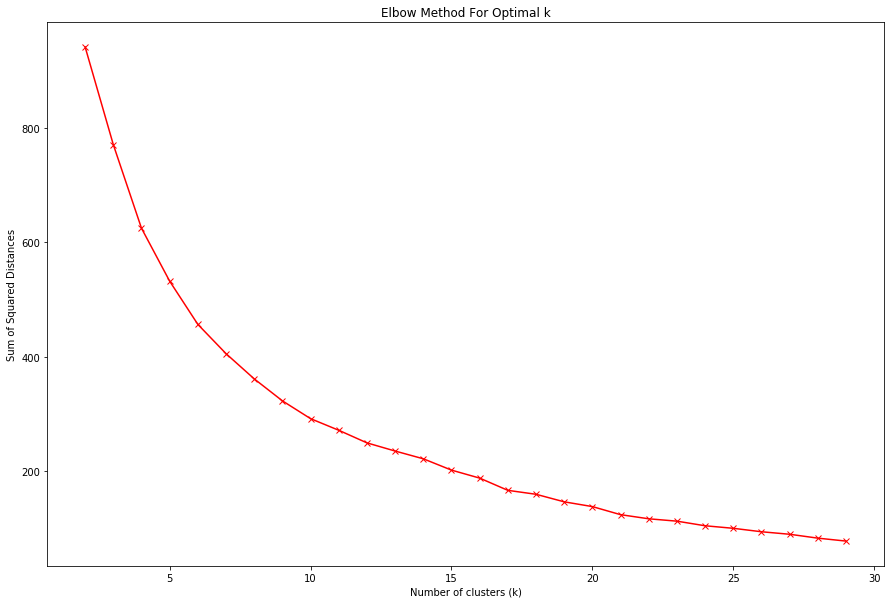

In [25]:
#call the function to compute wss
wss = calculate_wss(df_final.drop(columns='Country', axis=0))

#plot the scree plot
plt.figure(figsize=(15, 10))
plt.plot(range(2,30), wss, '-rx')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

As we can see in the graph above, the determinaation of the number of clusters is inconclusive.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


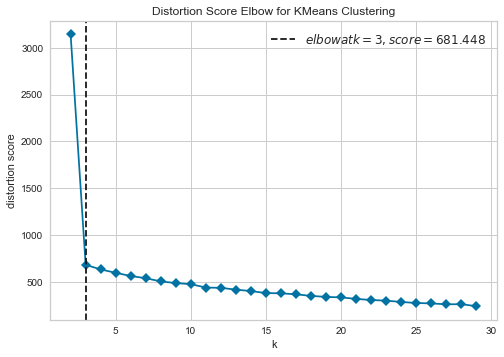

In [28]:
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Generate dataset
X, y = make_blobs(n_features=7, random_state=random_state)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 30), timings=False)

visualizer.fit(X)
visualizer.show()

## Step 5 - Analysing the K-Means and Agglomerative Clustering Models

### 5.1 - K-Means Model

In [ ]:
# running kmeans using the 'clusters_optimal'
kmeans = KMeans(n_clusters=clusters_optimal, random_state=random_state)

clusters_km = kmeans.fit_predict(df_final.drop(columns='Country', axis=0))

### 5.2 - Agglomerative Clustering Model

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

# fit and generate cluster
clusters_ag = agglom.fit_predict(df_final.drop(columns='Country', axis=0))

## Step 6 - Evaluating the Cluster Performance

In [ ]:
# import metrics libraries
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


- **higher** Silhouette Coefficient score relates to a model with **better** defined clusters
- **higher** Calinski-Harabasz score relates to a model with **better** defined clusters.
- **lower** Davies-Bouldin score index relates to a model with **better** separation between the clusters.

### 6.1 - Silhouette Score Metric

In [ ]:
# K-Means
si_kmeans = silhouette_score(df_final.drop(columns="Country", axis=0), clusters_km, metric='euclidean')

In [ ]:
# Agglomerative Clustering
si_agglom = silhouette_score(df_final.drop(columns="Country", axis=0), clusters_ag, metric='euclidean')

### 6.2 - Calinski Harabasz Score Metric

In [ ]:
# K-means
ch_kmeans = calinski_harabasz_score(df_final.drop(columns="Country", axis=0), clusters_km)

In [ ]:
# Agglomerative Clustering
ch_agglom = calinski_harabasz_score(df_final.drop(columns="Country", axis=0), clusters_ag)

### 6.3 - Davies Bouldin Score Metric

In [ ]:
# K-means
db_kmeans = davies_bouldin_score(df_final.drop(columns="Country", axis=0), clusters_km)

In [ ]:
# Agglomerative Clustering
db_agglom = davies_bouldin_score(df_final.drop(columns="Country", axis=0), clusters_ag)

## 7 - Selectioning the Best Technique

In [ ]:
print("** Higher is better **")
print("Silhouette Score - K-means      : ", si_kmeans)
print("Silhouette Score - Agglomerative: ", si_agglom)
print("\n** Higher is better **")
print("Calinski Harabaz - K-means      : ", ch_kmeans)
print("Calinski Harabaz - Agglomerative: ", ch_agglom)
print("\n** Lower is better **")
print("Davies Bouldin   - K-means      : ", db_kmeans)
print("Davies Bouldin   - Agglomerative: ", db_agglom)

From the cluster results above, we can see that **K-Means** is the best because it won in two metrics. Therefore, it will be used to examine in details if there is a hidden pattern in the dataset.

## 8 - Determing the Class for each Country

In [ ]:
df_final.head()

In [ ]:
df_final['Cluster Membership'] = clusters_km

In [ ]:
df_final.head()

In [ ]:
df_final.to_csv('df_final.csv', index=False)

## 9 - Generating the Cluster Centres

In [ ]:
ct_kn = kmeans.cluster_centers_
cts = pd.DataFrame(ct_kn)
cts.head()

In [ ]:
# getting the centers using unscaled data (inverse_transformation)
cts_rates = scalerRates.inverse_transform(cts)

centers = pd.DataFrame(cts_rates, columns=['Mortality Rate', 'Cases per M', 'Deaths per M', 'Recovered per M', 
                                           'Active per M', 'Critical per M', 'Tests per M'])
centers

In [ ]:
centers.to_csv('centers.csv', index_label='Class')

In [ ]:
# EXTRA - generating a report with original values and cluster membership
df_use.head()

In [ ]:
# getting the dataset with real values and "cluster membership"
columns_delete = ['Mortality_rate', 'Cases_per_ml', 'Deaths_per_ml', 'Recovered_per_ml', 
                  'Active_per_ml', 'Critical_per_ml', 'Tests_per_ml', 'Pop_ml']

df_real = df_use.drop(columns=columns_delete, axis=0)
df_real['Cluster Membership'] = clusters_km

df_real.head()

In [ ]:
df_real.to_csv('df_real.csv', index=False)